<a href="https://colab.research.google.com/github/K-Pridge/Prediction-of-Product-Sales/blob/main/Project_Part_3_Kyle_Pridgen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Loading Data***

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import packages
fpath = '/content/drive/MyDrive/Week 2 Data Colab /sales_predictions_2023.csv'

#Import file path to pandas using standard "df" for data frame
import pandas as pd
df = pd.read_csv(fpath)


In [4]:
#Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**How many rows and columns?**

Rows: 8523
Columns: 12

**What are the datatypes of each variable?**
- Object
- Float
- Integer


In [5]:
#Check the head
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## ***Data Cleaning ***

In [6]:
#Pull object columns
df.select_dtypes("object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [7]:
#Pull number columns
df.select_dtypes("number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [8]:
# Get the number of null values for all columns and save as a variable
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Use this result to calculate the percentage of null values for each column.
null_percent = null_sums/len(df) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

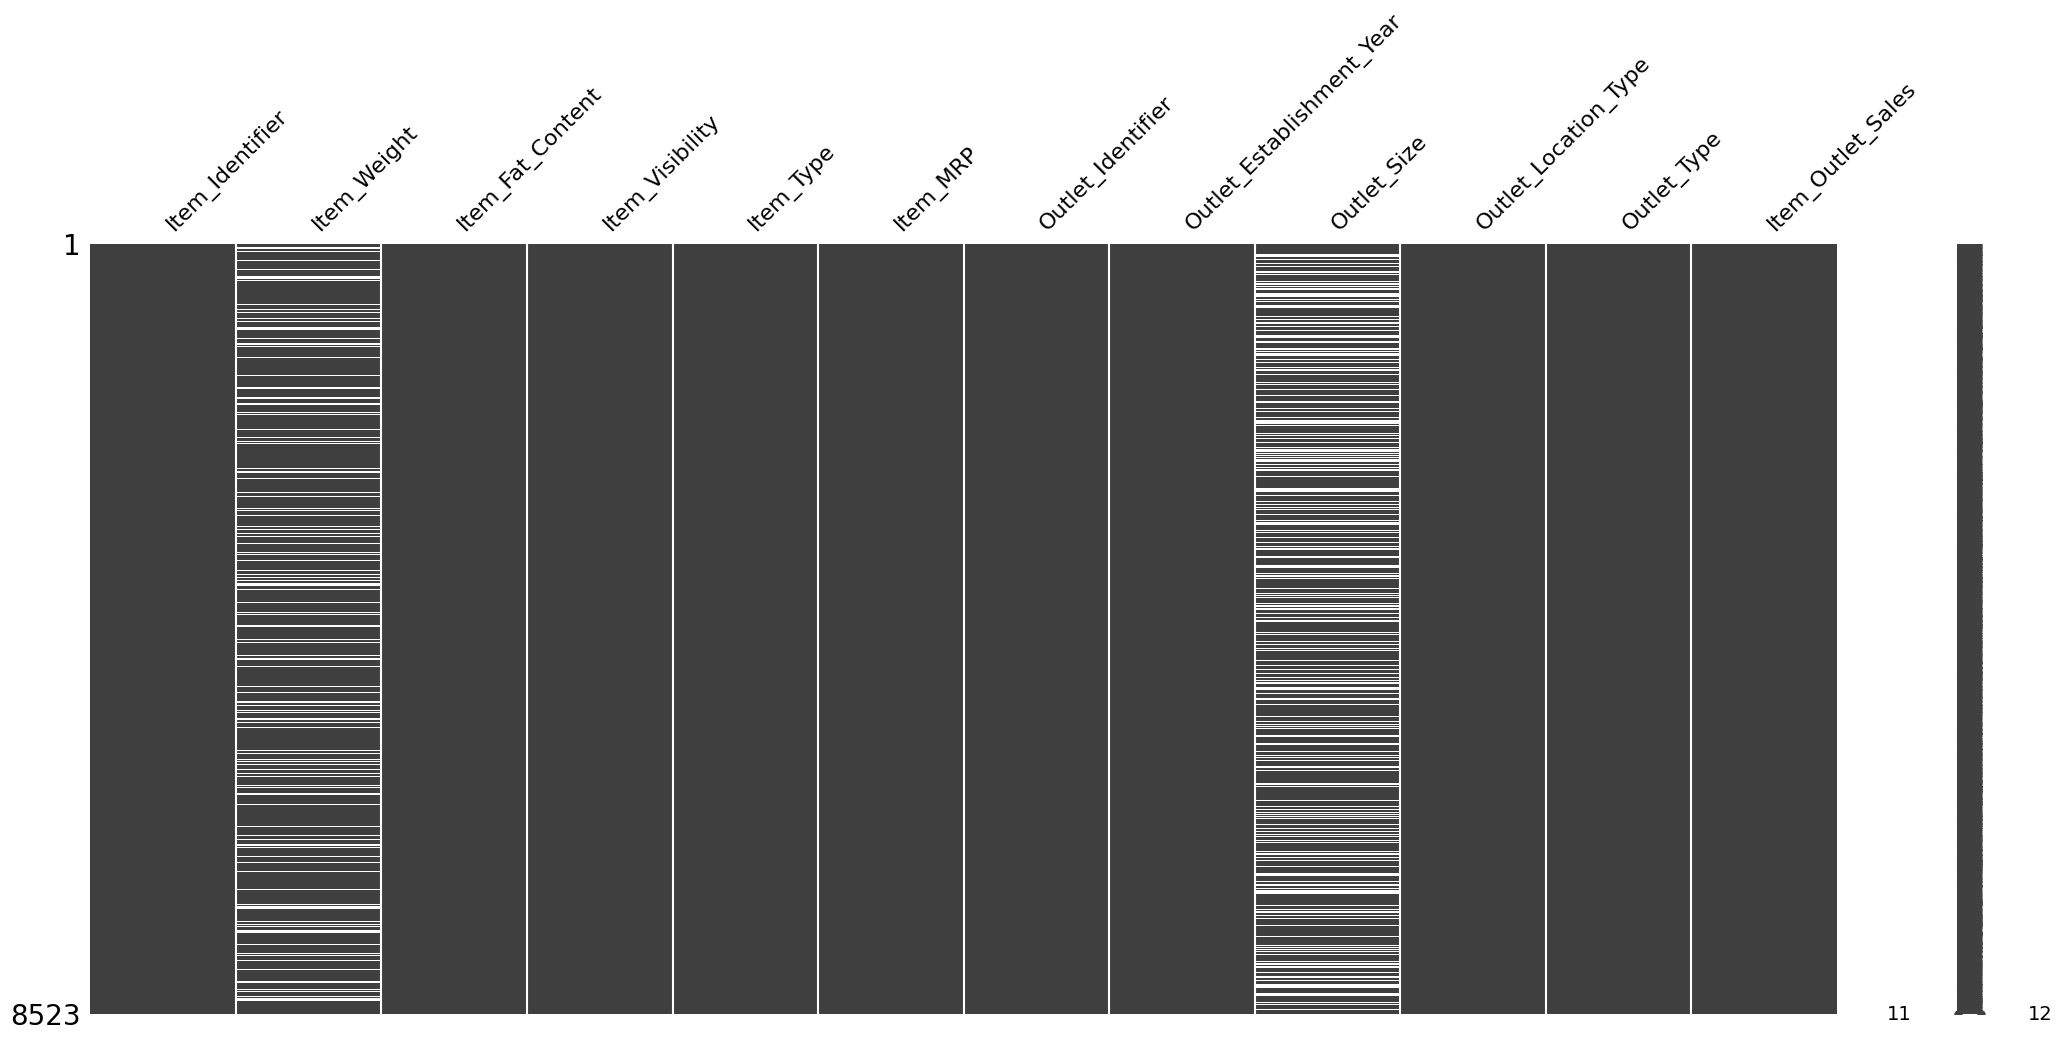

In [10]:
#Visualize missing values
import missingno as msno
msno.matrix(df);

In [11]:
#Identify duplicated rows using duplicated.(keep=False)
all_duplicated_rows = df.duplicated(keep=False)
all_duplicated_rows.sum()

0

In [12]:
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# save list of categorical column name
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [14]:
# use the list of cat columns to fill null values with MISSING
df[cat_cols] = df[cat_cols].fillna("MISSING")
df[cat_cols].value_counts(dropna=False)

Item_Identifier  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            LF                Soft Drinks            OUT035             Small        Tier 2                Supermarket Type1    1
FDV28            Regular           Frozen Foods           OUT010             MISSING      Tier 3                Grocery Store        1
FDV32            Low Fat           Fruits and Vegetables  OUT035             Small        Tier 2                Supermarket Type1    1
                                                          OUT019             Small        Tier 1                Grocery Store        1
                                                          OUT018             Medium       Tier 3                Supermarket Type2    1
                                                                                                                                    ..
FDJ22            Low Fat           Snack Foods            OU

In [15]:
#Save list of numeric column names
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
# use the list of num columns to fill null values with -1
df[num_cols] = df[num_cols].fillna(-1)
df[num_cols].value_counts(dropna=False)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales
-1.000       0.000000         37.0506   1985                       986.7156             1
 14.350      0.028519         109.2228  1998                       221.0456             1
 14.500      0.000000         169.6448  2004                       2045.3376            1
                              159.3262  2004                       2864.2716            1
                              154.4682  1987                       1524.6820            1
                                                                                       ..
 7.945       0.015901         163.8210  1999                       1794.3310            1
             0.015873         161.3210  2004                       2773.0570            1
             0.015863         161.8210  1987                       2446.8150            1
 7.935       0.031866         261.2910  2009                       2892.9010            1
 21.350      0.

In [17]:
#Confirm no more nulls using Pandas
df.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [18]:
#Drop Column Outlet_Location_Type
df= df.drop(columns=['Outlet_Location_Type'])
#Check by callinig the head
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Supermarket Type1,994.7052


In [19]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'Low_Fat':'Low Fat','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5201
Regular    2889
LF          316
reg         117
Name: Item_Fat_Content, dtype: int64

In [21]:
df['Item_Weight'].min()


-1.0

In [22]:
df['Item_Weight'].max()

21.35

In [23]:
df['Item_Weight'].mean()

10.478936407368296

In [24]:
df['Item_Visibility'].min()

0.0

In [25]:
df['Item_Visibility'].max()

0.328390948

In [26]:
df['Item_Visibility'].mean()

0.06613202877895108

In [27]:
df['Item_MRP'].min()

31.29

In [28]:
df['Item_MRP'].max()

266.8884

In [29]:
df['Item_MRP'].mean()

140.9927819781767

In [30]:
df['Outlet_Establishment_Year'].min()

1985

In [31]:
df['Outlet_Establishment_Year'].max()

2009

In [32]:
df['Outlet_Establishment_Year'].mean()

1997.8318667135984

In [33]:
df['Item_Outlet_Sales'].min()

33.29

In [34]:
df['Item_Outlet_Sales'].max()

13086.9648

In [35]:
df['Item_Outlet_Sales'].mean()

2181.288913575032

#Exploratoy Data Visualizations


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [36]:
#Call df.info() for columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [37]:
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

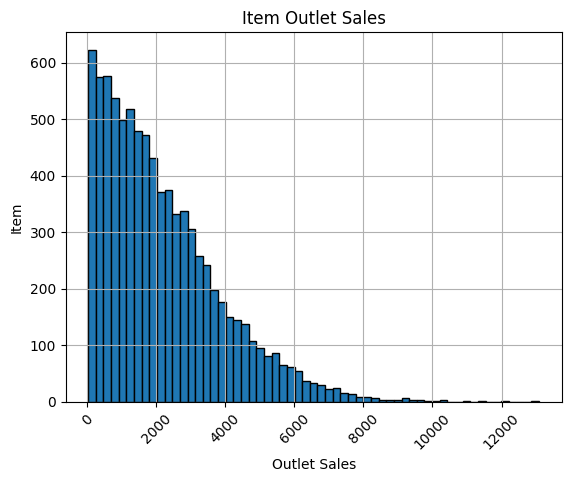

In [38]:
#Create histogram of Item_Outlet_Sales
ax = df['Item_Outlet_Sales'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x', rotation=45)
ax.ticklabel_format(style='plain')
ax.set_title("Item Outlet Sales")
ax.set_xlabel('Outlet Sales')
ax.set_ylabel('Item');


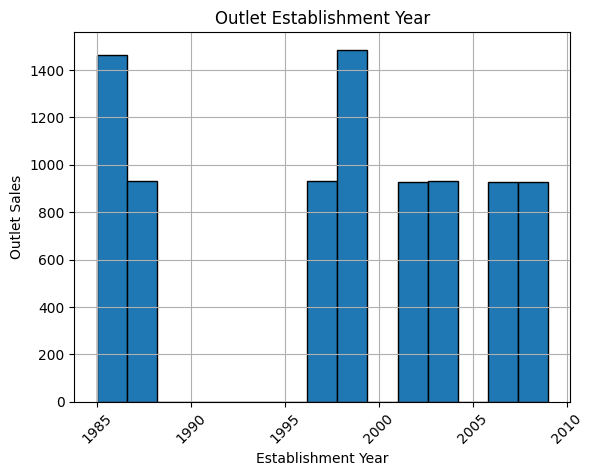

In [41]:
#Create histogram of Outlet_Establishment_Year
ax = df['Outlet_Establishment_Year'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x', rotation=45)
ax.ticklabel_format(style='plain')
ax.set_title("Outlet Establishment Year")
ax.set_xlabel('Establishment Year')
ax.set_ylabel('Outlet Sales');


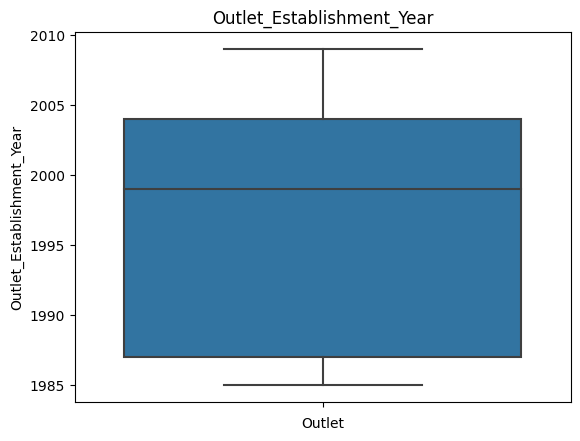

In [47]:
#Univariate boxplot using Seaborn for column 'Outlet_Establishment_Year'
ax = sns.boxplot(data = df, y = "Outlet_Establishment_Year")
ax.set_ylabel("Outlet_Establishment_Year")
ax.set_xlabel("Outlet")
ax.set_title("Outlet_Establishment_Year");

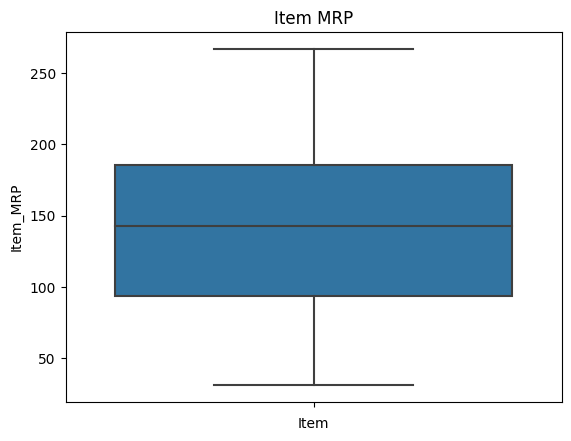

In [50]:
#Univariate boxplot using Seaborn for column 'Item_MRP'
ax = sns.boxplot(data = df, y = "Item_MRP")
ax.set_ylabel("Item_MRP")
ax.set_xlabel("Item")
ax.set_title("Item MRP");

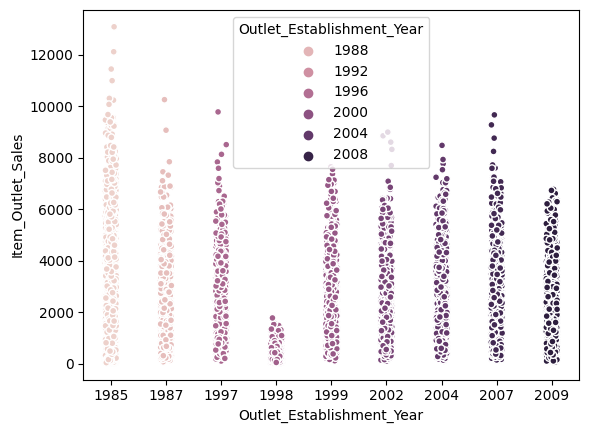

In [46]:
#Multivariate stripplot using numerical columns
ax = sns.stripplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales',
                   hue='Outlet_Establishment_Year', edgecolor='white', linewidth=1)

In [51]:
#Save value counts for 'Outlet_Size' as variable val_counts
val_counts = df['Outlet_Size'].value_counts()
val_counts


Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

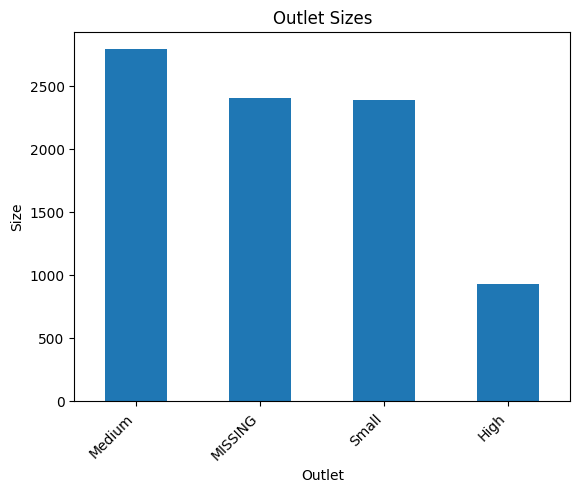

In [53]:
#Make a categorical plot using column 'Outlet_Size'
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Size");
ax.set_xlabel('Outlet');
ax.set_title("Outlet Sizes");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [54]:
#Save value counts for Outlet Type as 'val_counts_outlet_type'
val_counts_outlet_type = df['Outlet_Type'].value_counts()
val_counts_outlet_type

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

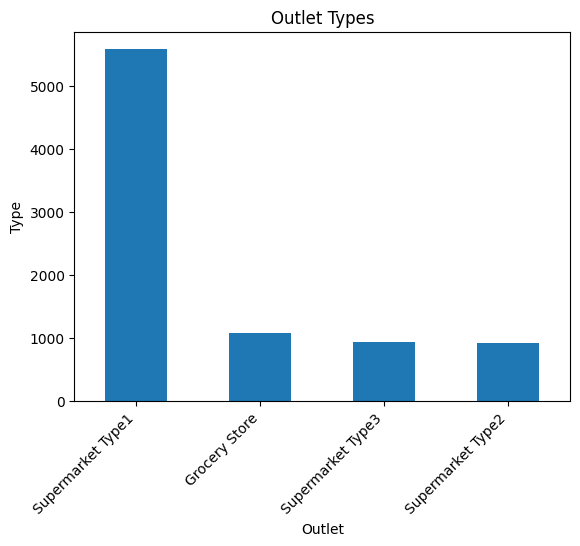

In [55]:
#Make a categorical plot using column 'Outlet_Type'
ax = val_counts_outlet_type.plot(kind='bar')
ax.set_ylabel("Type");
ax.set_xlabel('Outlet');
ax.set_title("Outlet Types");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

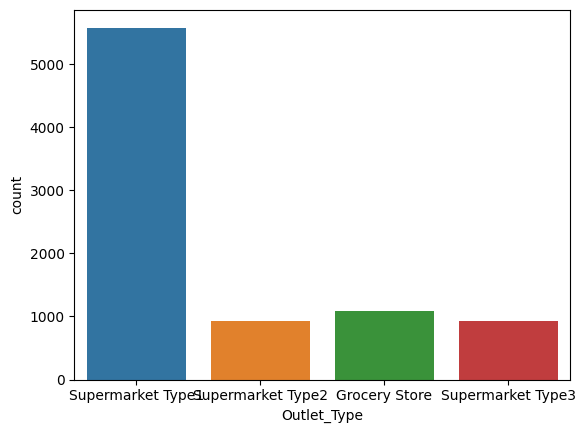

In [56]:
#Catplot using Seaborn for column 'Outlet_Type'
ax = sns.countplot(data=df, x="Outlet_Type")


#Correlation Heatmaps


In [57]:
#Define variable corr for Heatmap usage
corr = df.corr(numeric_only = True)
corr.round(2)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


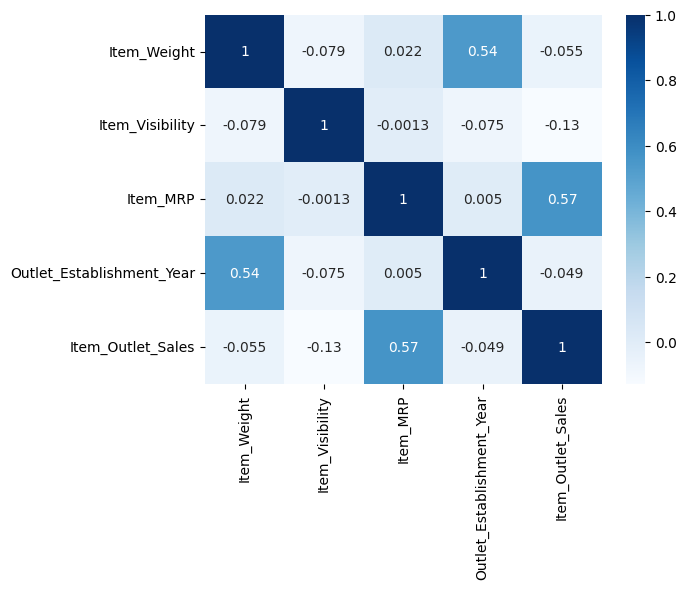

In [58]:
#Make a heatmap of correlations using cmap='Blues'
sns.heatmap(corr, cmap = 'Blues', annot = True);

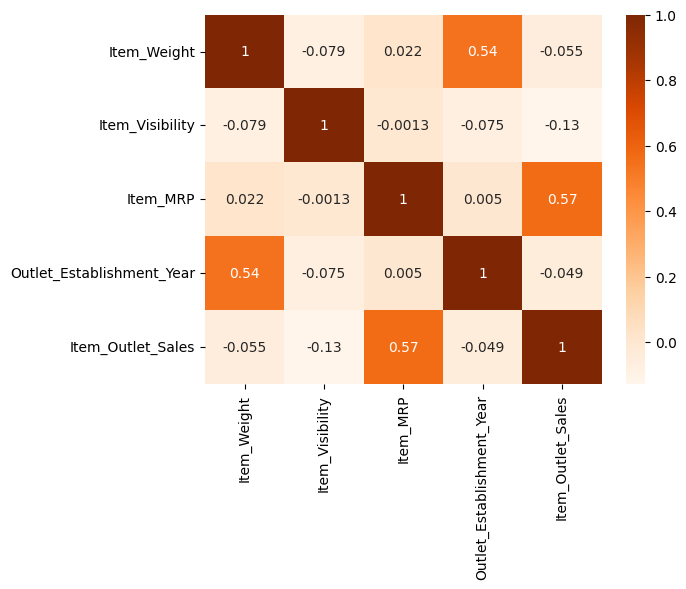

In [59]:
#Make a heatmap of correlations using cmap='Oranges'
sns.heatmap(corr, cmap = 'Oranges', annot = True);